In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [3]:
df = pd.read_csv('Gold Price (2013-2023).csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [5]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df

,Date,Price,Open,High,Low
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80"
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20"
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20"
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00"
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55"
...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80"
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30"
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00"
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30"


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Price,Open,High,Low
0,2013-01-02,"1,689.90","1,675.80","1,695.00","1,672.10"
1,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30"
2,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00"
3,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30"
4,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80"
...,...,...,...,...,...
2578,2022-12-26,"1,809.70","1,805.80","1,811.95","1,805.55"
2579,2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00"
2580,2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20"
2581,2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20"


In [7]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')
df

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.00,1672.10
1,2013-01-03,1675.6,1688.0,1689.30,1664.30
2,2013-01-04,1649.9,1664.4,1664.40,1630.00
3,2013-01-07,1647.2,1657.3,1663.80,1645.30
4,2013-01-08,1663.2,1651.5,1662.60,1648.80
...,...,...,...,...,...
2578,2022-12-26,1809.7,1805.8,1811.95,1805.55
2579,2022-12-27,1823.1,1808.2,1841.90,1808.00
2580,2022-12-28,1815.8,1822.4,1822.80,1804.20
2581,2022-12-29,1826.0,1812.3,1827.30,1811.20


In [8]:
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


In [9]:
df.duplicated().sum()
df.isnull().sum().sum()

np.int64(0)

In [10]:
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [11]:
features = ['Open', 'High', 'Low']
target = ['Price']
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

260

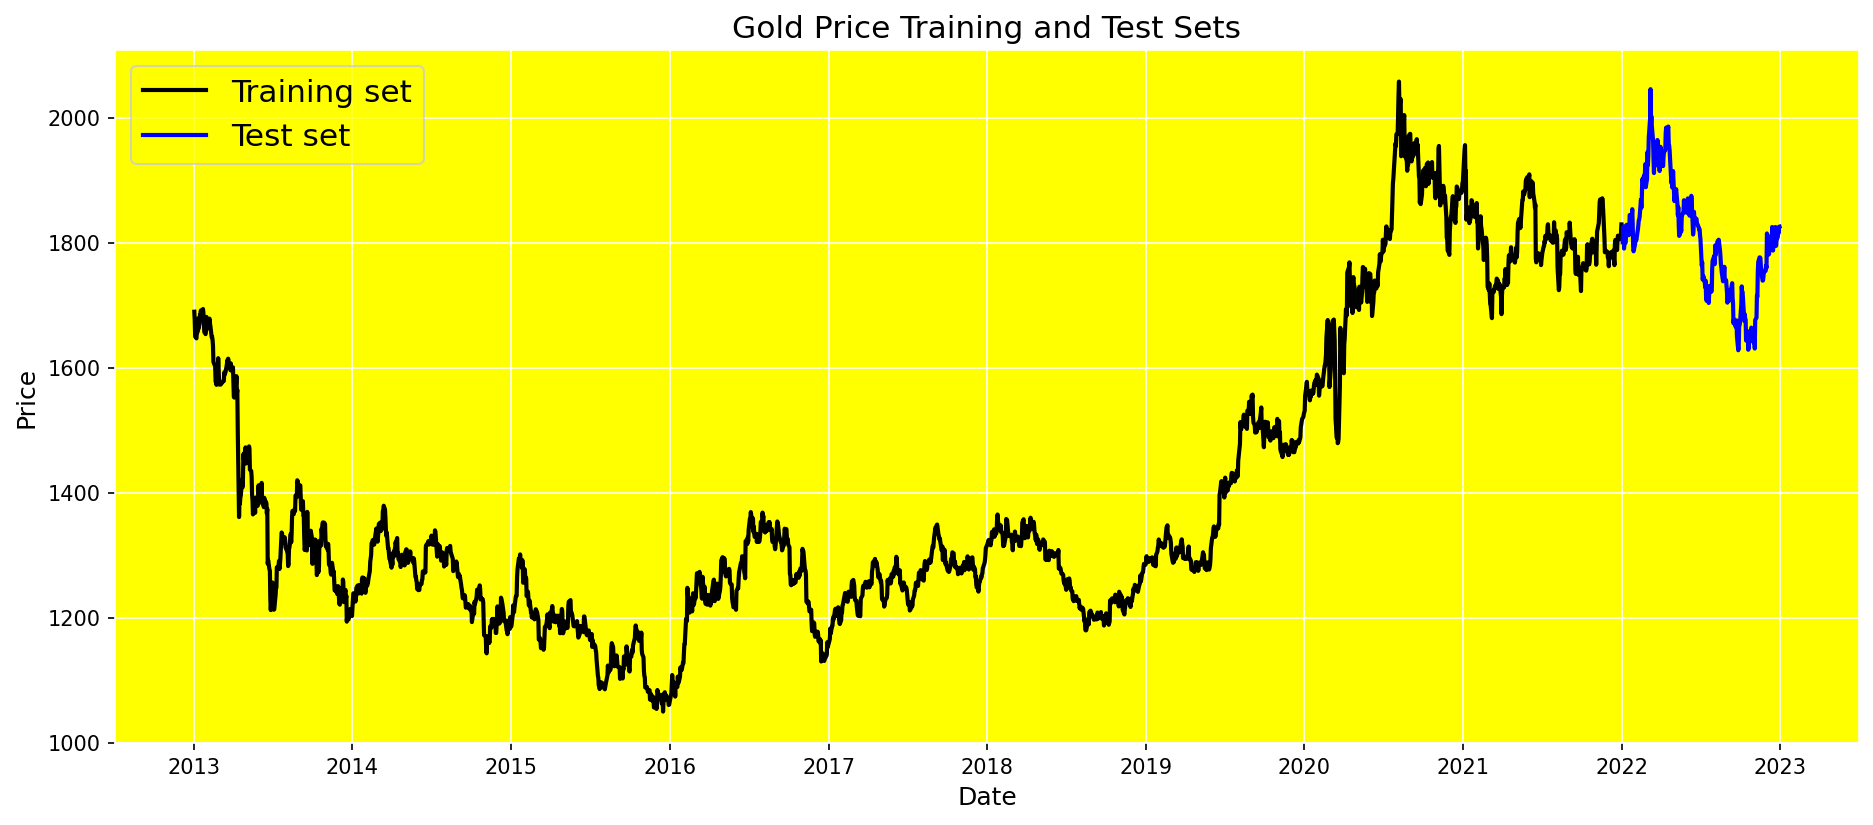

In [12]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [13]:
train_df = df.iloc[:-test_size].copy()
test_df = df.iloc[-test_size:].copy()

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [14]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(train_df[features])
scaler_y.fit(train_df[target])

X_train_scaled = scaler_x.transform(train_df[features])
y_train_scaled = scaler_y.transform(train_df[target])

full_df_features = pd.concat((train_df[features], test_df[features]), axis=0)
full_df_target = pd.concat((train_df[target], test_df[target]), axis=0)

inputs_X = full_df_features[len(full_df_features) - len(test_df) - 60:].values
inputs_y = full_df_target[len(full_df_target) - len(test_df) - 60:].values

inputs_X = scaler_x.transform(inputs_X)
inputs_y = scaler_y.transform(inputs_y)

d:\Project 1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

d:\Project 1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [15]:
window_size = 60
n_features = 3

In [16]:
X_train = []
y_train = []

for i in range(window_size, len(X_train_scaled)):
    X_train.append(X_train_scaled[i-window_size:i, :]) 
    y_train.append(y_train_scaled[i, 0])

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], window_size, n_features))

In [18]:
X_test = []
y_test = []

for i in range(window_size, len(inputs_X)):
    X_test.append(inputs_X[i-window_size:i, :])
    y_test.append(inputs_y[i, 0])

In [19]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], window_size, n_features))
y_test = np.reshape(y_test, (-1, 1))

In [20]:
print('X_train Shape:', X_train.shape) 
print('y_train Shape:', y_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_test Shape: ', y_test.shape)

X_train Shape: (2263, 60, 3)
y_train Shape: (2263,)
X_test Shape:  (260, 60, 3)
y_test Shape:  (260, 1)


In [21]:
def define_model():
    # Sửa shape input thành (window_size, n_features) tức là (60, 3)
    input1 = Input(shape=(window_size, n_features))
    
    x = LSTM(units=64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units=64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units=64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x) 
    dnn_output = Dense(1)(x) # Output là Price

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    return model

In [22]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,569 (334.25 KB)

 Trainable params: 85,569 (334.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0339 - val_loss: 0.0708
Epoch 2/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - val_loss: 0.0333
Epoch 3/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0066 - val_loss: 0.0146
Epoch 4/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0043 - val_loss: 0.0059
Epoch 5/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 6/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 7/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 8/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 9/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0014 - val_loss: 0.0069
Epoch 10/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 11/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 12/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step

In [23]:
y_pred = model.predict(X_test)

y_test_true = scaler_y.inverse_transform(y_test)
y_test_pred = scaler_y.inverse_transform(y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [24]:
MAPE = mean_absolute_percentage_error(y_test_true, y_test_pred) 
Accuracy = 1 - MAPE

In [25]:
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test MAPE: 0.014044712473950125
Test Accuracy: 0.9859552875260499


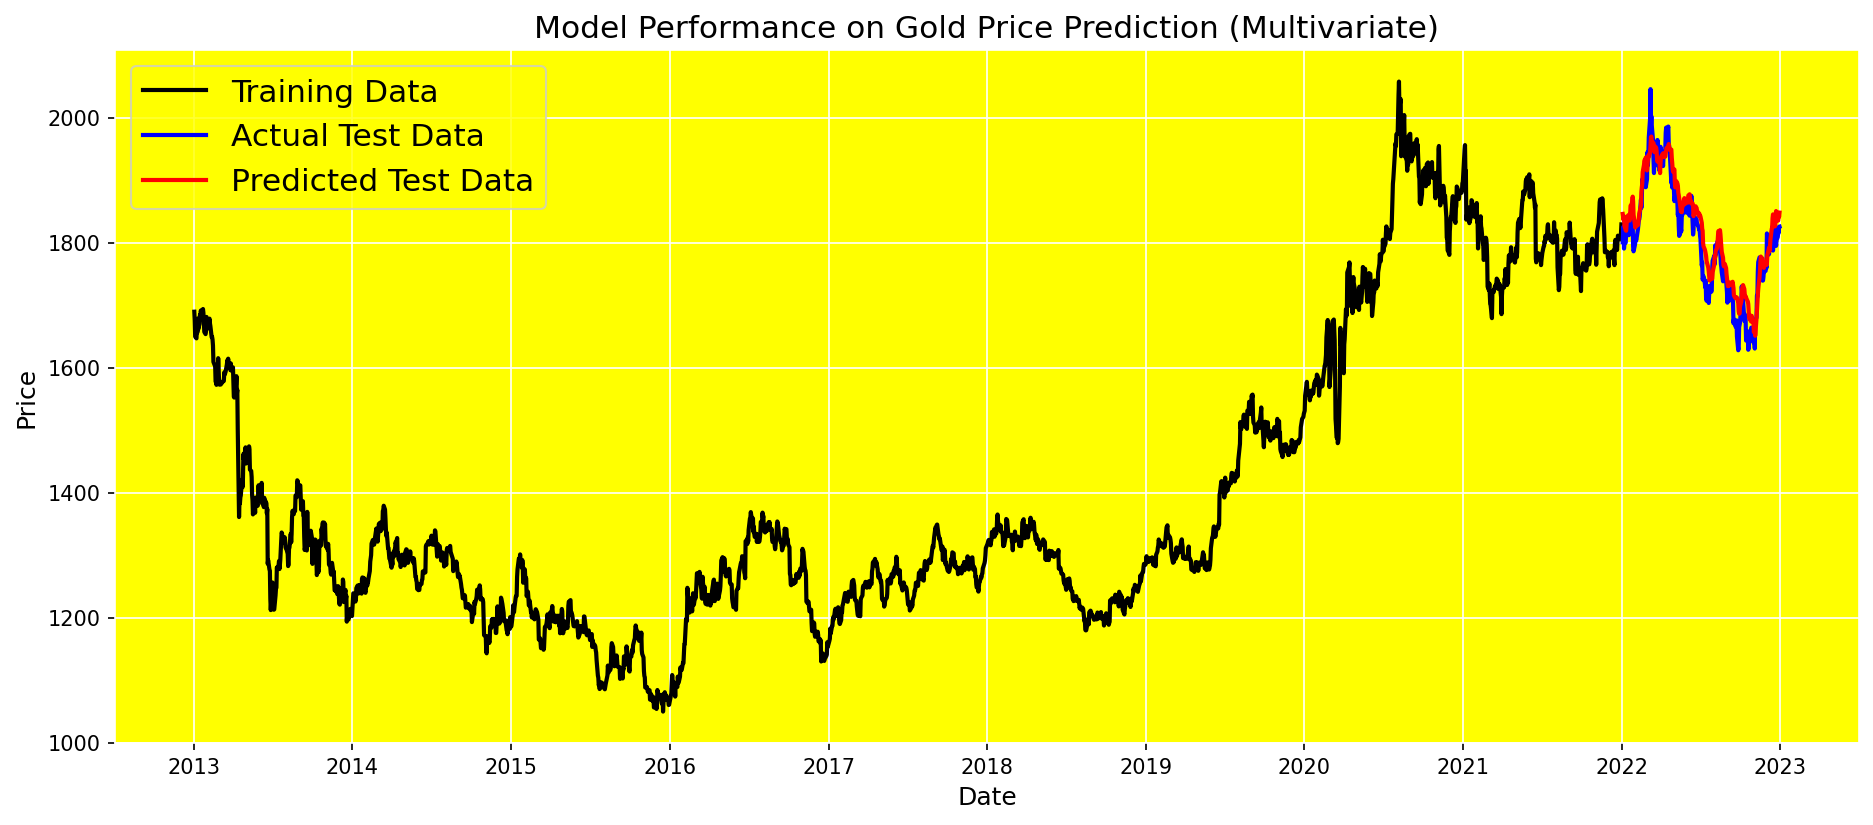

In [26]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')

train_data_actual = scaler_y.inverse_transform(y_train_scaled)
plt.plot(df['Date'].iloc[:-test_size], train_data_actual, color='black', lw=2)

test_dates = df['Date'].iloc[-test_size:]

plt.plot(test_dates, y_test_true, color='blue', lw=2)
plt.plot(test_dates, y_test_pred, color='red', lw=2)

plt.title('Model Performance on Gold Price Prediction (Multivariate)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()